Ya sea que el problema sea de **clasificación o regresión**, el objetivo es estimar el valor del objetivo y para un vector de características x dado; es decir, predecir y para una x dada.

Scikit-Learn tiene 3 objetos fundamentales:

    1. Estimadores --> Objetos que pueden estimar parámetros basandose en un conjunto de datos.
    2. Transformadores --> Estimadores que pueden transformar datos.
    3. Predictores --> Estimadores que pueden realizar predicciones a partir de datos.

In [5]:
import sklearn
from sklearn import datasets # sklearn is the Python name of scikit-learn 

iris = datasets.load_iris() 
type(iris)
sklearn.utils.Bunch

sklearn.utils._bunch.Bunch

In [9]:
iris.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
print(iris['target_names']) # or, equivalently, print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [12]:
print(iris.DESCR[:500])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



In [13]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Nos referimos a la matriz que contiene todos los vectores de características como **matriz de datos** (también conocida como **matriz de características**).

Por convención, scikit-learn asume que esta matriz tiene la forma de:

    tamaño de la muestra × tamaño de la característica 
    
    O en otras palabras
    
    el número de observaciones × el número de características

In [14]:
iris.data.shape 

(150, 4)

In [15]:
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
# CONTAR EL NÚMERO DE MUESTRAS DE CADA CLASE

import numpy as np 
np.bincount(iris.target) 

array([50, 50, 50], dtype=int64)

In [17]:
print('type of data: ' + str(type(iris.data))+ '\ntype of target: ' + str(type(iris.target)))

type of data: <class 'numpy.ndarray'>
type of target: <class 'numpy.ndarray'>


In [18]:
#VER LOS NOMBRES DE LAS CARACTERÍSTICAS

print(iris.feature_names) # the name of features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
#DIVIDIR LOS DATOS EN ENTRENAMIENTO Y PRUEBA 80:20

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, 
test_size=0.2, stratify=iris.target)

print(
    'X_train_shape: ' + str(X_train.shape) + 
    '\nX_test_shape: ' + str(X_test.shape) +
    '\ny_train_shape: ' + str(y_train.shape) +
    '\ny_test_shape: ' + str(y_test.shape)
)

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)


In [21]:
#Contar el número de observaciones específicas de clase en los datos de entrenamiento
np.bincount(y_train) 

array([40, 40, 40], dtype=int64)

In [29]:
#Graficar un pair plot
import pandas as pd 

X_train_df = pd.DataFrame(X_train, columns=iris.feature_names) 
y_train_df = pd.DataFrame(y_train, columns=['class']) 
X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1) 

In [28]:
!pip install seaborn

C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


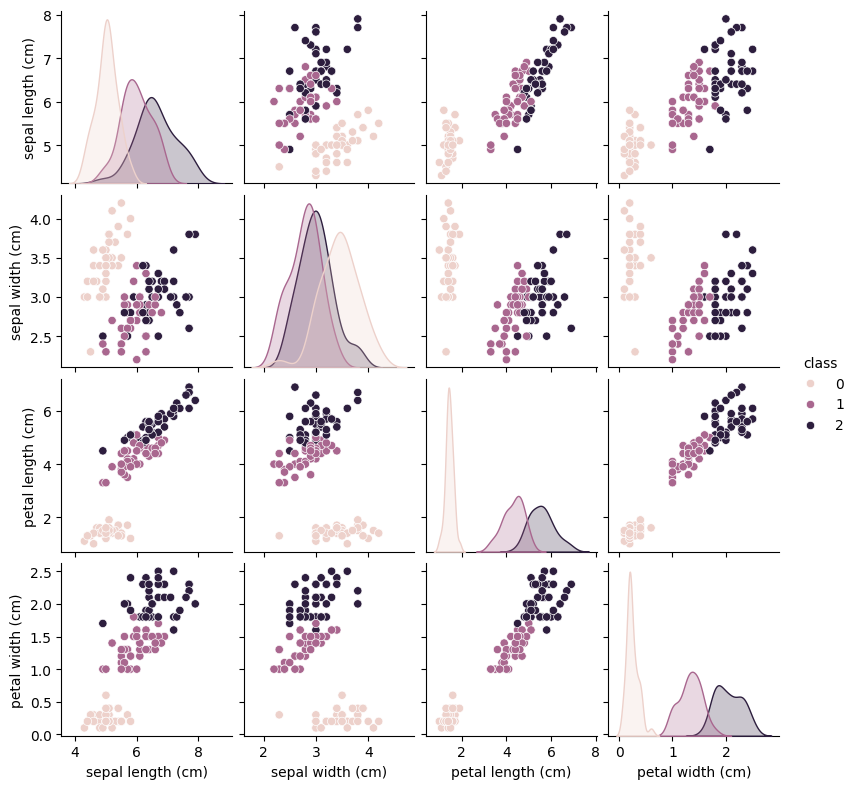

In [31]:
import seaborn as sns

sns.pairplot(X_y_train_df, hue='class', height=2) 

# hue is set to the class variable in the dataframe so that they are plotted in 
#different color and we are able to distinguish classes 

**Sobre el escalado/normalización de los datos:**

Incluso si no estamos seguros de si una regla específica de ML se beneficia del escalado, 
sería útil escalar los datos, ya que el escalado no es perjudicial y, al mismo tiempo, facilita 
la comparación de diferentes tipos de modelos, independientemente de si se benefician o 
no del escalado.

Calcula la media y la desviación estándar de cada característica en el conjunto de entrenamiento: 

In [33]:
mean = X_train.mean(axis=0) # to take the mean across rows (for each column) 
std = X_train.std(axis=0) # to take the std across rows (for each column) 
X_train_scaled = X_train - mean # notice the utility of broadcasting 
X_train_scaled /= std 

X_train_scaled.mean(axis=0) # observe the mean is 0 now

array([-4.21884749e-16,  1.20042865e-16, -3.88578059e-16, -7.04991621e-16])

In [34]:
X_train_scaled.std(axis=0) # observe the std is 1 now 

array([1., 1., 1., 1.])

**El conjunto de prueba no se debe utilizar ni siquiera en una etapa de preprocesamiento como la normalización.**

• Punto 1: Al entrenar un clasificador, la cuestión más importante es su rendimiento 
con observaciones no observadas (futuras) recopiladas desde la misma aplicación. 
En otras palabras, el valor total del clasificador depende de su rendimiento con 
observaciones no observadas. 

• Punto 2: Dado que las observaciones “no observadas”, como su nombre indica, no 
están disponibles durante el entrenamiento, utilizamos el conjunto de prueba (disponible) para simular el efecto de las observaciones no observadas al evaluar el clasificador entrenado.  

• Punto 3: Como resultado del punto 2, para obtener una evaluación imparcial del 
clasificador utilizando el conjunto de prueba, este debe clasificar las observaciones 
en el conjunto de prueba exactamente de la misma manera que se utiliza para 
clasificar las observaciones futuras no observadas.

• Punto 4: Las observaciones no observadas no están disponibles y, naturalmente, no 
pueden utilizarse en ninguna etapa de entrenamiento, como la normalización, la 
selección de características, etc.; por lo tanto, las observaciones del conjunto de 
prueba tampoco deben utilizarse en ninguna etapa de entrenamiento. 

Un error común es aplicar preprocesamiento de datos, como la normalización, 
antes de dividir los datos en conjuntos de entrenamiento y de prueba. Esto provoca fugas de datos; es decir, que parte de la información del conjunto de prueba se filtre en el proceso de entrenamiento

Esto **desde el punto de vista de la evaluación del modelo con datos de prueba**, que es la razón más común para dividir los datos en dos conjuntos. Sin embargo, **puede ser una práctica legitima** desde la perspectiva de:

    1) Entrenar un clasificador mediante aprendizaje semisupervisado. Sin embargo, incluso después deentrenar el clasificador utilizando dicho procedimiento de aprendizaje semisupervisado, aún necesitamos un conjunto de prueba independiente para evaluar su rendimiento.
    2) Evaluación del modelo utilizando un estimador de rendimiento con propiedades desconocidas.


In [37]:
X_test_scaled = X_test - mean 
X_test_scaled /= std

print(X_test_scaled.mean(axis=0)) 
print(X_test_scaled.std(axis=0)) 

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


**scikit-learn para realizar la estandarización**

In [43]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

print(X_test_scaled.mean(axis=0)) # observe that we get the same values for the mean and std of test set as in the naive implementation shown above 
print(X_test_scaled.std(axis=0)) 

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


Guardar los arrays de entrenamiento y prueba en archivos binarios con numpy.save()

In [56]:
import numpy as np 

np.savez('data/iris_train_scaled', X = X_train_scaled, y = y_train) 
np.savez('data/iris_test_scaled', X = X_test_scaled, y = y_test)

**Entrenar un modelo de kNN**

In [62]:
from sklearn.neighbors import KNeighborsClassifier as kNN  # giving an alias kNN for simplicity 

knn = kNN(n_neighbors=3)  # hyperparameter k is set to 3; that is, we have 3NN

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

**Predicción usando el modelo entrenado**

In [63]:
x_test = np.array([[5.5, 2, 1.1, 0.6]]) # same as: np.array([5.5, 2, 1.1, 0.6]).reshape(1,4) 
x_test.shape 

(1, 4)

In [64]:
x_test_scaled = scaler.transform(x_test) 
x_test_scaled

array([[-0.45404756, -2.53437275, -1.50320017, -0.79582245]])

In [66]:
y_test_prediction = knn.predict(x_test_scaled) 
print('knn predicts: ' + str(iris.target_names[y_test_prediction])) # to convert the prediction (y_test_prediction) to the names of Iris flower 

knn predicts: ['versicolor']


También podemos proporcionar varios puntos de muestra como argumento para el método 
predict(). En ese caso, recibimos la etiqueta asignada a cada una de ellas:

In [67]:
y_test_predictions = knn.predict(X_test_scaled) 
print('knn predicts: ' + str(iris.target_names[y_test_predictions])) # fancy indexing

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


La secuencia de operaciones anterior puede combinarse en el siguiente patrón de una sola línea, conocido como encadenamiento 
de métodos:

In [69]:
y_test_predictions = kNN(n_neighbors=3).fit(X_train_scaled, y_train).predict(X_test_scaled) 
print('knn predicts: ' + str(iris.target_names[y_test_predictions]))

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


**Evaluación del modelo**

Calculando la estimación del error del conjunto de prueba de nuestro clasificador kNN 
entrenado

In [70]:
errors = (y_test_predictions != y_test) 
errors

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [76]:
error_est = sum(errors) / errors.size

print('The error rate estimate is: {:.2f}'.format(error_est) + 
      '\n' + 
      'The accuracy is: {:.2f}'.format(1 - error_est))

The error rate estimate is: 0.10
The accuracy is: 0.90


En el código anterior, utilizamos el marcador de posición { } y el especificador de formato 0.2f para especificar el número de dígitos después del punto decimal. El ":" antes de .2f separa el especificador de formato del resto del campo de reemplazo (si se establece alguna opción) dentro de {}. 

In [78]:
#La función accuracy_score espera las etiquetas reales y 
#las etiquetas predichas como argumentos: 
from sklearn.metrics import accuracy_score 

print('The accuracy is {:.2f}'.format(accuracy_score(y_test, y_test_predictions)))

The accuracy is 0.90


Todos los clasificadores en scikit-learn también tienen un método de puntuación que, dados 
los datos de prueba y sus etiquetas, devuelve la precisión del clasificador; por ejemplo, 

In [79]:
print('The accuracy is {:.2f}'.format(knn.score(X_test_scaled, y_test)))

The accuracy is 0.90
